# Predicting Vehicle Prices Using Regression Models

## **Objectives**  
The primary goal of this project is to develop a robust regression model to predict used car prices for a reseller based on various listed features and specifications. In addition to predicting prices, the project focuses on identifying feature importance and mitigating overfitting through the application of regularisation techniques.

There can be several business objectives for this, such as:

* **Price Prediction**: Model car prices based on features like mileage, fuel type, and performance.
* **Market Analysis**: Explore trends and preferences in the used car market, by type, region, or other metrics.
* **Feature Importance**: Identify the most important factors influencing car prices (e.g., fuel type, mileage, age).

The data pipeline for this task involves the following steps:  
1. **Dataset Overview**   
2. **Data Preprocessing**
3. **Data Visualisation & Exploration**
4. **Model Building**
3. **Regularisation**

## **1 Data Understanding**

| **Variable** | **Description** |
--------|--------------|
| `make_model` | The brand and model of the vehicle (e.g., 'Audi A1'). |
| `body_type` | The body style of the vehicle, such as Sedan, Compact, or Station Wagon. |
| `price`  | The listed price of the car in currency. |
| `vat`  | Indicates the VAT status for the vehicle's price (e.g., VAT deductible, Price negotiable). |
| `km` | The total mileage (in kilometers) of the vehicle, indicating its usage. |
| `Type` | Condition of the vehicle, whether it's 'Used' or 'New'.|
| `Fuel` | Type of fuel the vehicle uses, such as 'Diesel', 'Benzine', etc. |
| `Gears` | The number of gears in the vehicle's transmission. |
| `Comfort_Convenience` | Comfort and convenience features, such as 'Air conditioning', 'Leather steering wheel', 'Cruise control', and more. |
| `Entertainment_Media` | Media features available in the vehicle, including 'Bluetooth', 'MP3', 'Radio', etc. |
| `Extras` | Additional features like 'Alloy wheels', 'Sport suspension', etc.|
| `Safety_Security` | Safety features like 'ABS', 'Airbags', 'Electronic stability control', 'Isofix', etc.  |
| `age` | Age of the car (calculated based on the model year). |
| `Previous_Owners`| The number of previous owners the car has had. |
| `hp_kW` | Engine power in kilowatts (kW), indicating the performance capacity of the engine.|
| `Inspection_new` | Indicates whether the car has recently undergone an inspection (1 for yes, 0 for no). |
| `Paint_Type`| The type of paint on the car, such as 'Metallic', 'Matte', etc. |
| `Upholstery_type` | The material used for the interior upholstery, such as 'Cloth', 'Leather', etc.|
| `Gearing_Type` | The type of transmission the car uses, either 'Automatic' or 'Manual'. |
| `Displacement_cc` | The engine displacement in cubic centimeters (cc), indicating the size of the engine.|
| `Weight_kg` | The total weight of the vehicle in kilograms.|
| `Drive_chain` | The type of drivetrain, indicating whether it's 'Front' or 'Rear' wheel drive. |
| `cons_comb`  | The combined fuel consumption in liters per 100 kilometers.|

### **1.1 Data Loading**

**Importing Necessary Libraries**

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### **1.1.1**
Load the dataset

In [2]:
 # Load the data
df = pd.read_csv("Car_Price_data.csv")

## **2 Analysis and Feature Engineering**



### **2.1 Preliminary Analysis and Frequency Distributions**

#### **2.1.1**  Check and fix missing values.

In [3]:
# Find the proportion of missing values in each column and handle if found
df.isnull().sum()

,0
make_model,0
body_type,0
price,0
vat,0
km,0
Type,0
Fuel,0
Gears,0
Comfort_Convenience,0
Entertainment_Media,0


***Numerical:***
1. price [Target feature]
2. km
3. Gears
4. age
5. hp_kW
6. Displacement_cc
7. Weight_kg
8. cons_comb

***Categorical:***
1. make_model
2. body_type
3. Type
4. Fuel
5. Comfort_Convenience
6. Entertainment_Media
7. Extras
8. Safety_Security
9. Previous_Owners
10. Inspection_new
11. Paint_Type
12. Upholstery_type
13. Gearing_Type
14. Drive_chain
15. vat

#### **2.1.2** Identify numerical predictors and plot their frequency distributions.

In [4]:
print("Min\n", df.min(numeric_only=True))
print("Max\n", df.max(numeric_only=True))

Min
 price              4950.0
km                    0.0
Gears                 5.0
age                   0.0
Previous_Owners       0.0
hp_kW                40.0
Inspection_new        0.0
Displacement_cc     890.0
Weight_kg           840.0
cons_comb             3.0
dtype: float64
Max
 price               74600.0
km                 317000.0
Gears                   8.0
age                     3.0
Previous_Owners         4.0
hp_kW                 294.0
Inspection_new          1.0
Displacement_cc      2967.0
Weight_kg            2471.0
cons_comb               9.1
dtype: float64


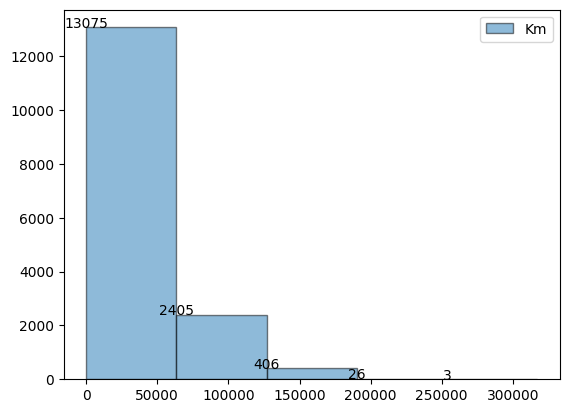

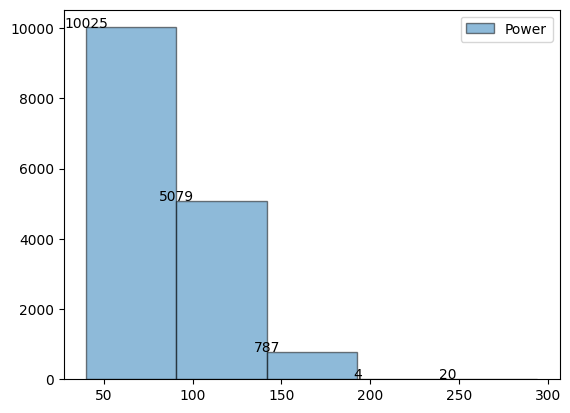

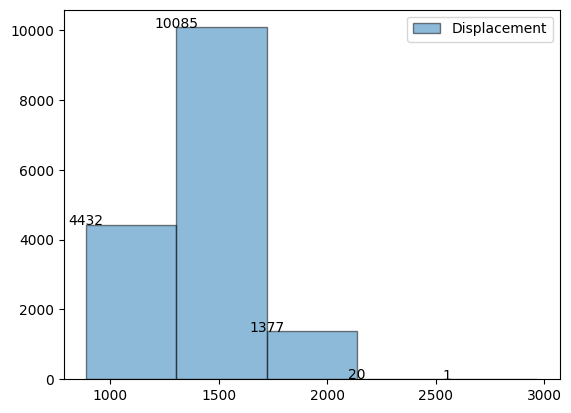

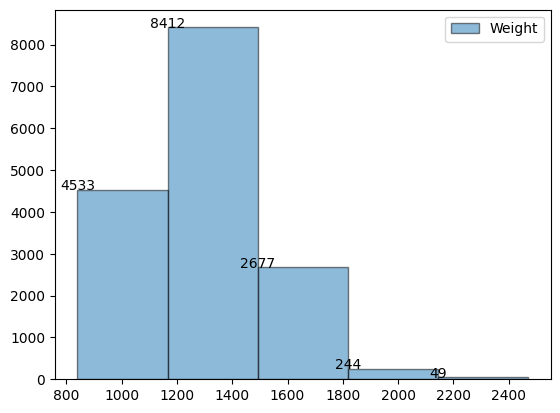

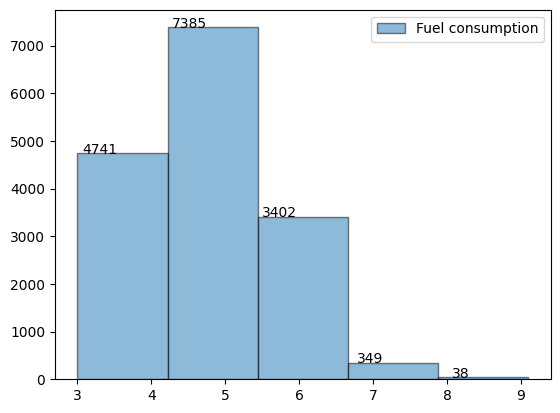

In [5]:
# Identify numerical features and plot histograms
counts, bins, patches = plt.hist(df["km"], bins=5, alpha=0.5, edgecolor="black", label="Km")
for count, bin in zip(counts, bins[:-1]):
    plt.text(bin + 0.3, count + 0.1, str(int(count)), ha='center')
plt.legend()
plt.show()
counts, bins, patches = plt.hist(df["hp_kW"], bins=5, alpha=0.5, edgecolor="black", label="Power")
for count, bin in zip(counts, bins[:-1]):
    plt.text(bin + 0.3, count + 0.1, str(int(count)), ha='center')
plt.legend()
plt.show()
counts, bins, patches = plt.hist(df["Displacement_cc"], bins=5, alpha=0.5, edgecolor="black", label="Displacement")
for count, bin in zip(counts, bins[:-1]):
    plt.text(bin + 0.3, count + 0.1, str(int(count)), ha='center')
plt.legend()
plt.show()
counts, bins, patches = plt.hist(df["Weight_kg"], bins=5, alpha=0.5, edgecolor="black", label="Weight")
for count, bin in zip(counts, bins[:-1]):
    plt.text(bin + 0.3, count + 0.1, str(int(count)), ha='center')
plt.legend()
plt.show()
counts, bins, patches = plt.hist(df["cons_comb"], bins=5, alpha=0.5, edgecolor="black", label="Fuel consumption")
for count, bin in zip(counts, bins[:-1]):
    plt.text(bin + 0.3, count + 0.1, str(int(count)), ha='center')
plt.legend()
plt.show()


#### **2.1.3** Identify categorical predictors and plot their frequency distributions.

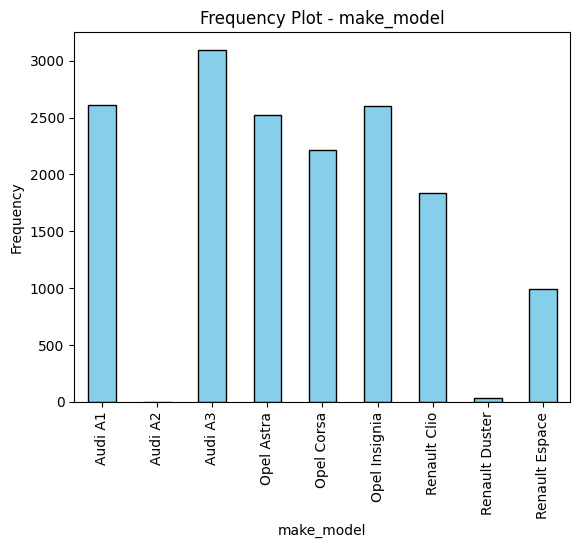

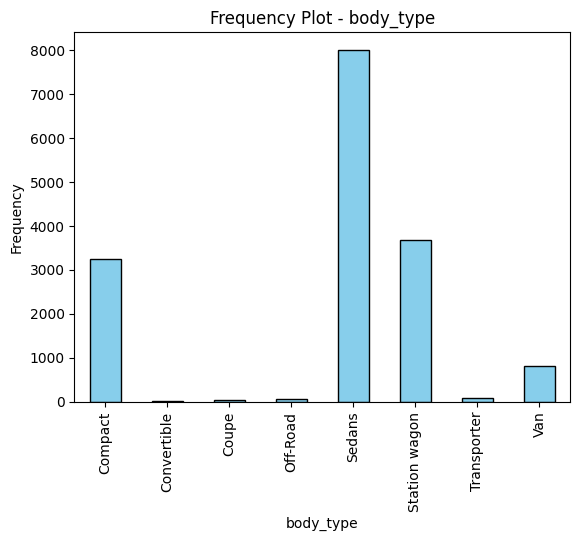

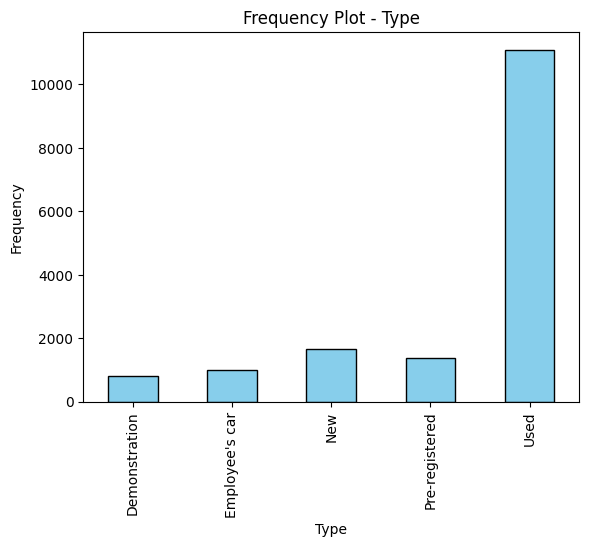

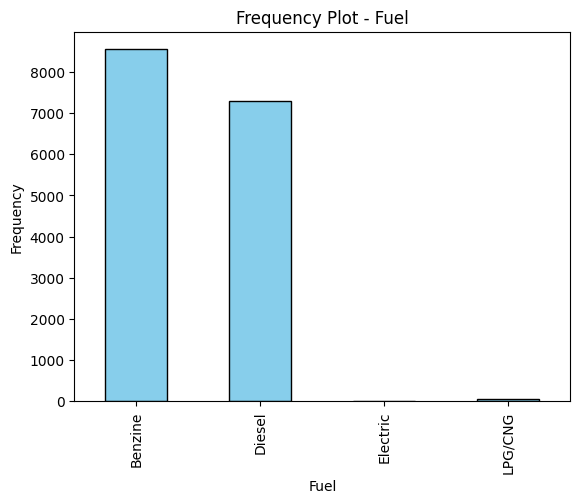

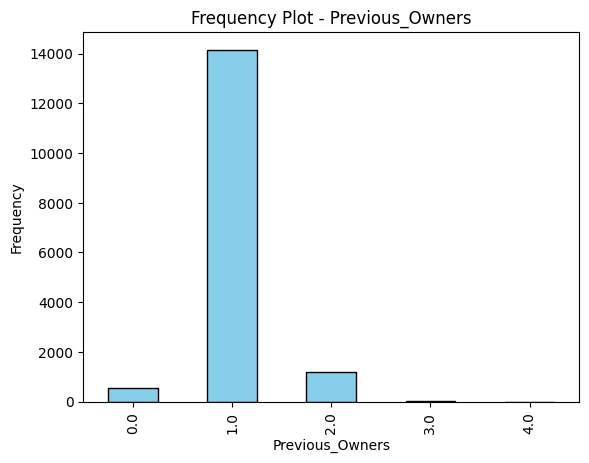

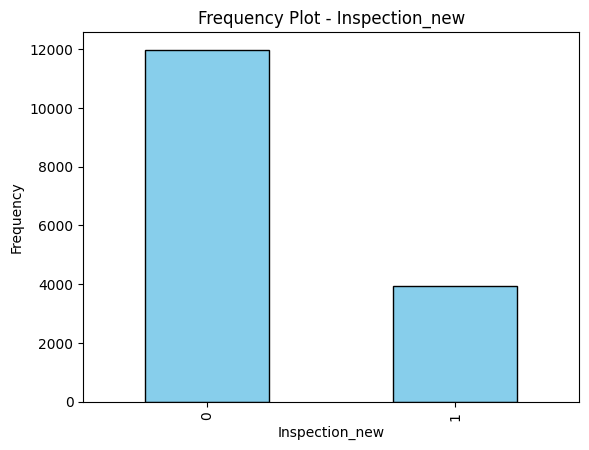

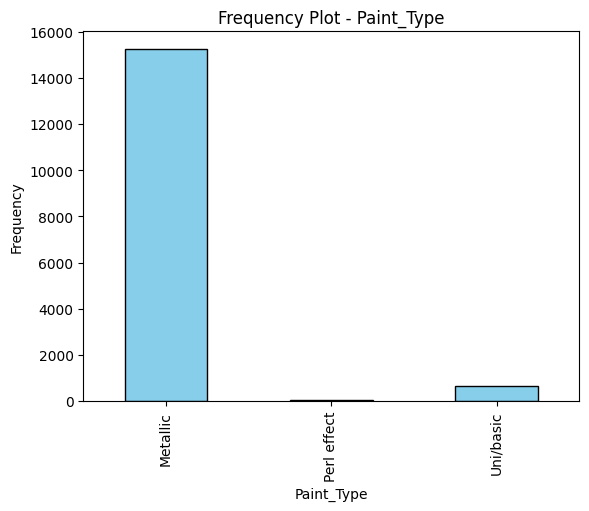

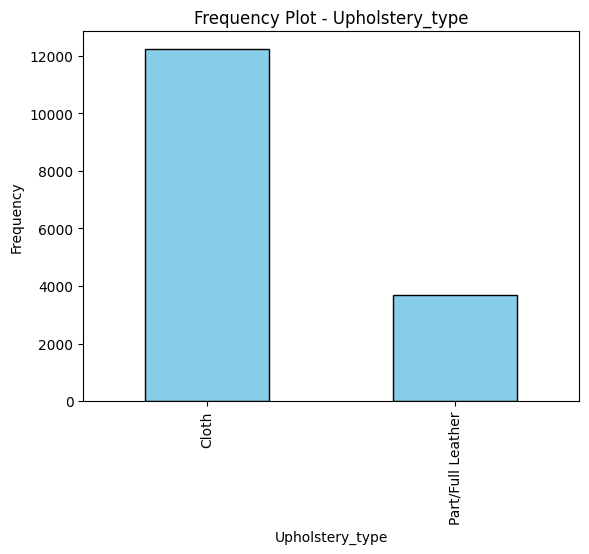

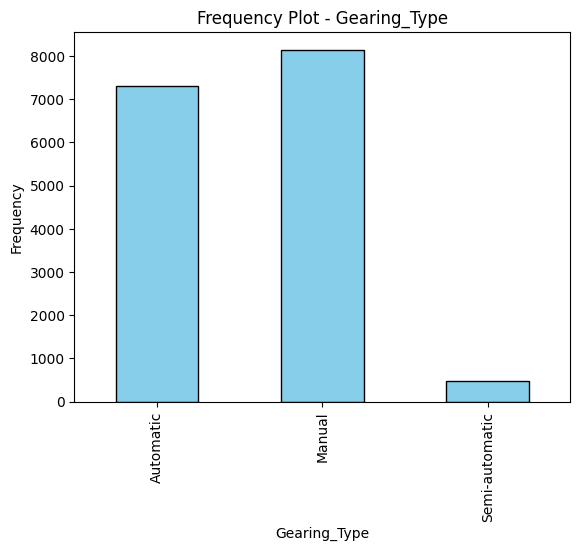

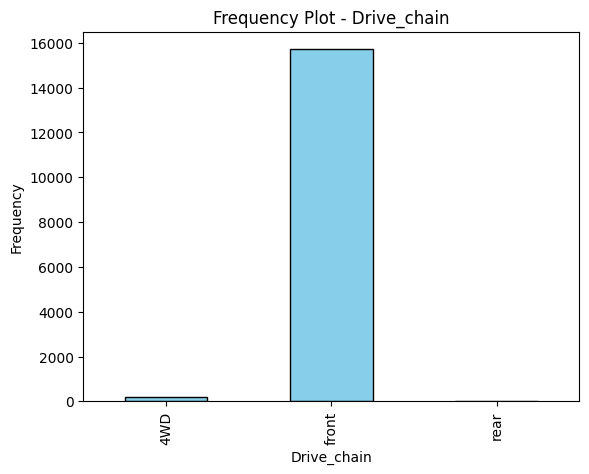

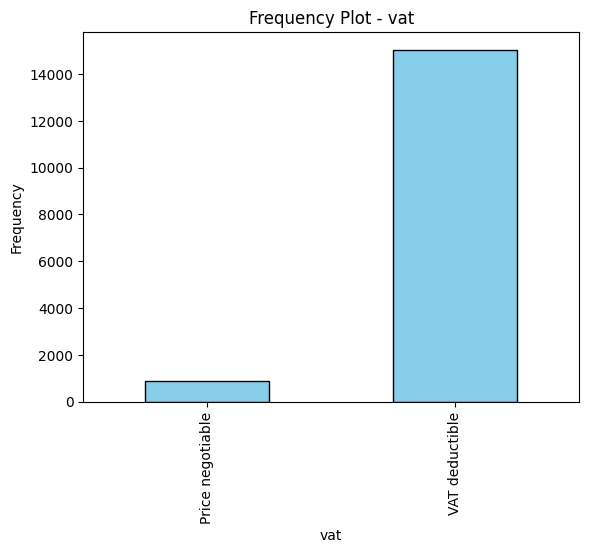

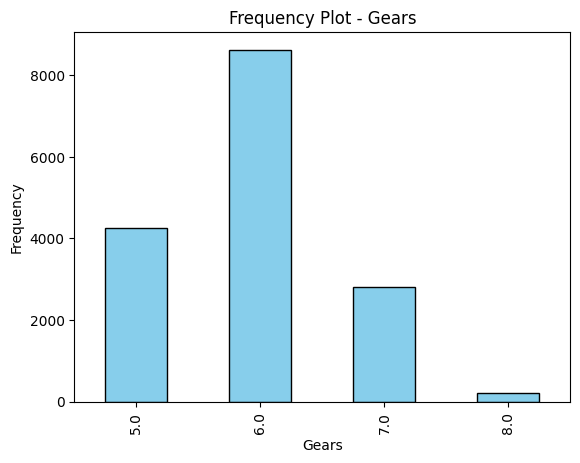

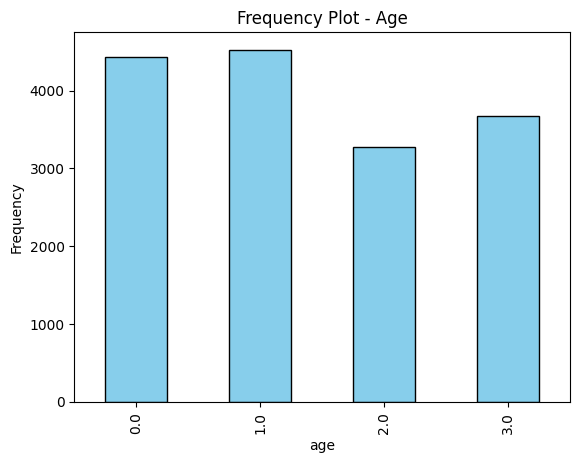

In [6]:
# Identify categorical columns and check their frequency distributions

# make_model frequency plot
counts = df["make_model"].value_counts().sort_index()
counts.plot(kind="bar", color="skyblue", edgecolor="black")
plt.xlabel("make_model")
plt.ylabel("Frequency")
plt.title("Frequency Plot - make_model")
plt.show()

# body_type frequency plot
counts = df["body_type"].value_counts().sort_index()
counts.plot(kind="bar", color="skyblue", edgecolor="black")
plt.xlabel("body_type")
plt.ylabel("Frequency")
plt.title("Frequency Plot - body_type")
plt.show()

# Type frequency plot
counts = df["Type"].value_counts().sort_index()
counts.plot(kind="bar", color="skyblue", edgecolor="black")
plt.xlabel("Type")
plt.ylabel("Frequency")
plt.title("Frequency Plot - Type")
plt.show()

# Fuel frequency plot
counts = df["Fuel"].value_counts().sort_index()
counts.plot(kind="bar", color="skyblue", edgecolor="black")
plt.xlabel("Fuel")
plt.ylabel("Frequency")
plt.title("Frequency Plot - Fuel")
plt.show()

# Previous_Owners frequency plot
counts = df["Previous_Owners"].value_counts().sort_index()
counts.plot(kind="bar", color="skyblue", edgecolor="black")
plt.xlabel("Previous_Owners")
plt.ylabel("Frequency")
plt.title("Frequency Plot - Previous_Owners")
plt.show()

# Inspection_new frequency plot
counts = df["Inspection_new"].value_counts().sort_index()
counts.plot(kind="bar", color="skyblue", edgecolor="black")
plt.xlabel("Inspection_new")
plt.ylabel("Frequency")
plt.title("Frequency Plot - Inspection_new")
plt.show()

# Paint_Type frequency plot
counts = df["Paint_Type"].value_counts().sort_index()
counts.plot(kind="bar", color="skyblue", edgecolor="black")
plt.xlabel("Paint_Type")
plt.ylabel("Frequency")
plt.title("Frequency Plot - Paint_Type")
plt.show()

# Upholstery_type frequency plot
counts = df["Upholstery_type"].value_counts().sort_index()
counts.plot(kind="bar", color="skyblue", edgecolor="black")
plt.xlabel("Upholstery_type")
plt.ylabel("Frequency")
plt.title("Frequency Plot - Upholstery_type")
plt.show()

# Gearing_Type frequency plot
counts = df["Gearing_Type"].value_counts().sort_index()
counts.plot(kind="bar", color="skyblue", edgecolor="black")
plt.xlabel("Gearing_Type")
plt.ylabel("Frequency")
plt.title("Frequency Plot - Gearing_Type")
plt.show()

# Drive_chain frequency plot
counts = df["Drive_chain"].value_counts().sort_index()
counts.plot(kind="bar", color="skyblue", edgecolor="black")
plt.xlabel("Drive_chain")
plt.ylabel("Frequency")
plt.title("Frequency Plot - Drive_chain")
plt.show()

# vat frequency plot
counts = df["vat"].value_counts().sort_index()
counts.plot(kind="bar", color="skyblue", edgecolor="black")
plt.xlabel("vat")
plt.ylabel("Frequency")
plt.title("Frequency Plot - vat")
plt.show()

# Gears frequency plot (Numerical data but discrete values 5,6,7,8)
counts = df["Gears"].value_counts().sort_index()
counts.plot(kind="bar", color="skyblue", edgecolor="black")
plt.xlabel("Gears")
plt.ylabel("Frequency")
plt.title("Frequency Plot - Gears")
plt.show()

# Age frequency plot (Numerical data but discrete values 0,1,2,3)
counts = df["age"].value_counts().sort_index()
counts.plot(kind="bar", color="skyblue", edgecolor="black")
plt.xlabel("age")
plt.ylabel("Frequency")
plt.title("Frequency Plot - Age")
plt.show()

In [7]:
df["Comfort_Convenience"].unique()

array(['Air conditioning,Armrest,Automatic climate control,Cruise control,Electrical side mirrors,Hill Holder,Leather steering wheel,Light sensor,Multi-function steering wheel,Navigation system,Park Distance Control,Parking assist system sensors rear,Power windows,Rain sensor,Seat heating,Start-stop system',
       'Air conditioning,Automatic climate control,Hill Holder,Leather steering wheel,Lumbar support,Parking assist system sensors rear,Power windows,Start-stop system,Tinted windows',
       'Air conditioning,Cruise control,Electrical side mirrors,Hill Holder,Leather steering wheel,Multi-function steering wheel,Navigation system,Park Distance Control,Parking assist system sensors front,Parking assist system sensors rear,Power windows,Seat heating,Start-stop system',
       ...,
       'Air conditioning,Armrest,Automatic climate control,Cruise control,Electrically adjustable seats,Electrically heated windshield,Electrical side mirrors,Electric tailgate,Heads-up display,Heated steer

In [8]:
df["Entertainment_Media"].unique()

array(['Bluetooth,Hands-free equipment,On-board computer,Radio',
       'Bluetooth,Hands-free equipment,On-board computer,Radio,Sound system',
       'MP3,On-board computer',
       'Bluetooth,CD player,Hands-free equipment,MP3,On-board computer,Radio,Sound system,USB',
       'Bluetooth,CD player,Hands-free equipment,MP3,On-board computer,Radio,USB',
       'Bluetooth,Hands-free equipment,On-board computer,Radio,Sound system,USB',
       'Bluetooth,CD player,Hands-free equipment,On-board computer,Radio,Sound system,USB',
       'CD player,MP3,Radio', 'Radio',
       'CD player,Hands-free equipment,On-board computer,Radio,USB',
       'Bluetooth,On-board computer,Radio',
       'Bluetooth,CD player,Hands-free equipment,On-board computer,Radio',
       'Bluetooth,CD player,Hands-free equipment,MP3,On-board computer,Radio',
       'Bluetooth,CD player,Digital radio,Hands-free equipment,MP3,On-board computer,Radio,USB',
       'Radio,Sound system',
       'Bluetooth,CD player,MP3,On-board

In [9]:
df["Extras"].unique()

array(['Alloy wheels,Catalytic Converter,Voice Control',
       'Alloy wheels,Sport seats,Sport suspension,Voice Control',
       'Alloy wheels,Voice Control',
       'Alloy wheels,Sport seats,Voice Control',
       'Alloy wheels,Sport package,Sport suspension,Voice Control',
       'Alloy wheels,Sport package,Sport seats,Sport suspension',
       'Alloy wheels', 'Alloy wheels,Shift paddles',
       'Alloy wheels,Sport seats',
       'Alloy wheels,Catalytic Converter,Sport package,Sport seats,Sport suspension,Voice Control',
       'Alloy wheels,Sport seats,Sport suspension',
       'Alloy wheels,Sport package,Sport seats',
       'Alloy wheels,Sport package',
       'Alloy wheels,Catalytic Converter,Shift paddles,Voice Control',
       'Alloy wheels,Shift paddles,Sport package,Voice Control',
       'Alloy wheels,Catalytic Converter,Sport seats,Voice Control,Winter tyres',
       'Alloy wheels,Winter tyres', 'Alloy wheels,Catalytic Converter',
       'Catalytic Converter', 'Alloy whee

In [10]:
df["Safety_Security"].unique()

array(['ABS,Central door lock,Daytime running lights,Driver-side airbag,Electronic stability control,Fog lights,Immobilizer,Isofix,Passenger-side airbag,Power steering,Side airbag,Tire pressure monitoring system,Traction control,Xenon headlights',
       'ABS,Central door lock,Central door lock with remote control,Daytime running lights,Driver-side airbag,Electronic stability control,Head airbag,Immobilizer,Isofix,Passenger-side airbag,Power steering,Side airbag,Tire pressure monitoring system,Traction control,Xenon headlights',
       'ABS,Central door lock,Daytime running lights,Driver-side airbag,Electronic stability control,Immobilizer,Isofix,Passenger-side airbag,Power steering,Side airbag,Tire pressure monitoring system,Traction control',
       ...,
       'ABS,Blind spot monitor,Central door lock,Daytime running lights,Driver-side airbag,Electronic stability control,Emergency brake assistant,Fog lights,Immobilizer,Lane departure warning system,LED Daytime Running Lights,LED Hea

#### **2.1.4** Fix columns with low frequency values and class imbalances.

In [11]:
# Fix columns as needed
df["Type"].value_counts()


,count
Type,
Used,11095
New,1649
Pre-registered,1364
Employee's car,1011
Demonstration,796


In [12]:
df['Type'] = df['Type'].replace({
    'New': 'New-like',
    'Pre-registered': 'New-like',
    "Employee's car": 'Company/Short-use',
    'Demonstration': 'Company/Short-use'
})

print(df['Type'].value_counts())

Type
Used                 11095
New-like              3013
Company/Short-use     1807
Name: count, dtype: int64


#### **2.1.5** Identify target variable and plot the frequency distributions. Apply necessary transformations.

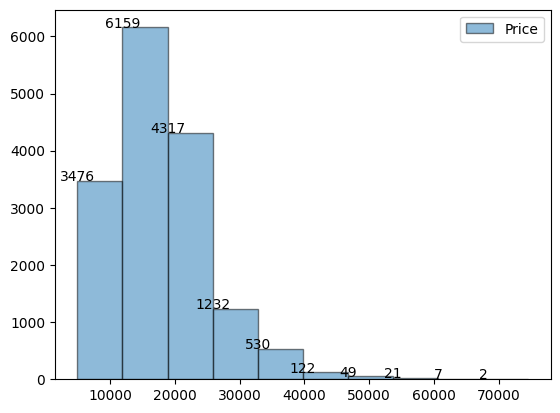

In [13]:
# Plot histograms for target feature
counts, bins, patches = plt.hist(df["price"], bins=10, alpha=0.5, edgecolor="black", label="Price")
for count, bin in zip(counts, bins[:-1]):
    plt.text(bin + 0.3, count + 0.1, str(int(count)), ha='center')
plt.legend()
plt.show()

### **2.2 Correlation analysis**

#### **2.2.1** Plot the correlation map between features and target variable.

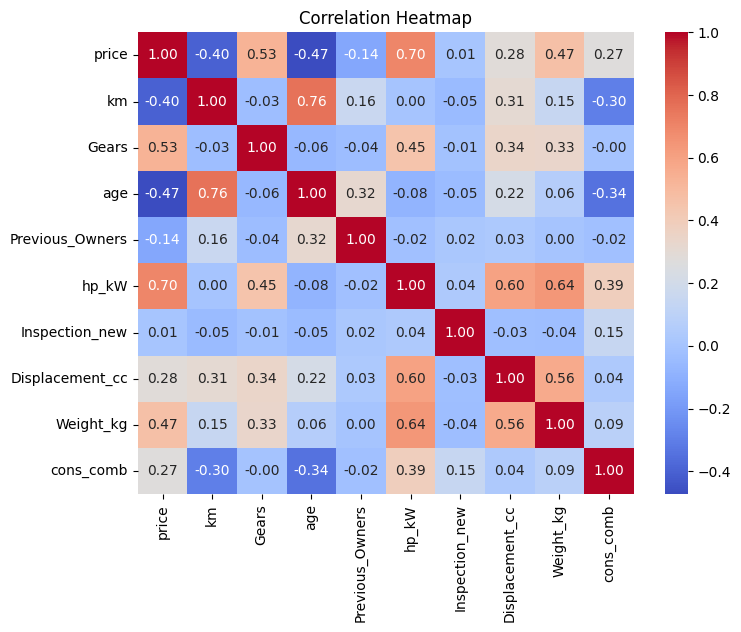

In [14]:
# Visualise correlation
# Compute correlation matrix
numeric_df = df.select_dtypes(include=["number"])
corr = numeric_df.corr()
# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

#### **2.2.2** <font color =red> [3 marks] </font>
Analyse correlation between categorical features and target variable.

In [15]:
# Comparing average values of target for different categories
df.groupby("Gearing_Type")["price"].mean()

,price
Gearing_Type,
Automatic,21163.176237
Manual,14913.777396
Semi-automatic,23236.562900


In [16]:
df.groupby("Fuel")["price"].mean().sort_values()

,price
Fuel,
LPG/CNG,16359.843750
Benzine,17899.681329
Diesel,18177.407783
Electric,29157.800000


In [17]:
df.groupby("make_model")["price"].mean().sort_values()

,price
make_model,
Opel Corsa,11061.841606
Renault Clio,11940.320827
Renault Duster,13230.176471
Opel Astra,15840.834059
Audi A1,18864.688982
Audi A3,20996.693252
Opel Insignia,21463.451886
Audi A2,28200.000000
Renault Espace,30080.211907


### **2.3 Outlier analysis**

#### **2.3.1** Identify potential outliers in the data.

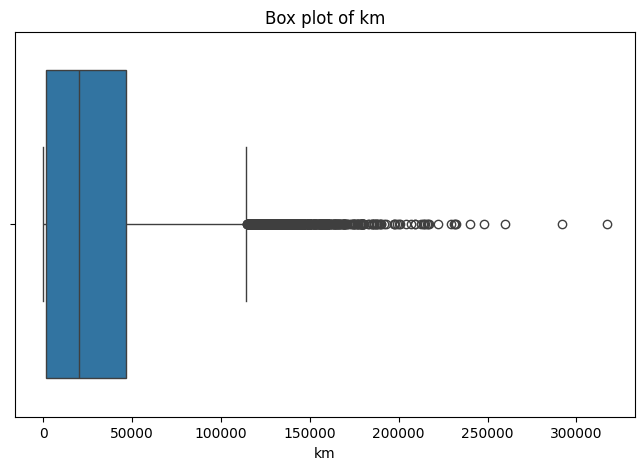

In [18]:
# km outlier analysis
plt.figure(figsize=(8,5))
sns.boxplot(x=df['km'])
plt.title('Box plot of km')
plt.show()

In [19]:
Q1 = df['km'].quantile(0.25)
Q3 = df['km'].quantile(0.75)
IQR = Q3 - Q1
outliers = ((df['km'] < Q1 - 1.5*IQR) | (df['km'] > Q3 + 1.5*IQR))
outlier_percent = outliers.sum() / len(df) * 100
print(outlier_percent)

4.329249136035187


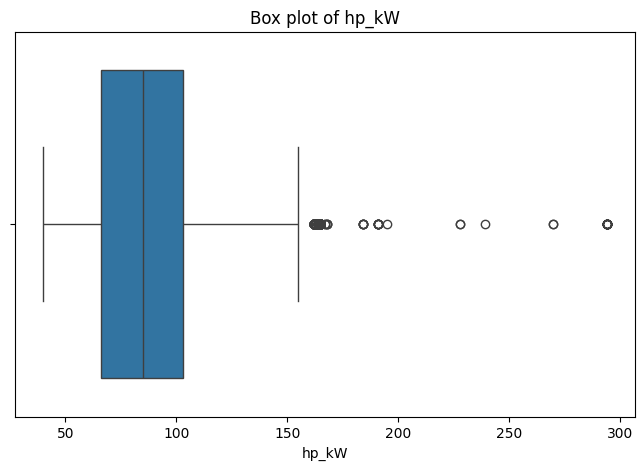

In [20]:
# hp_kW outlier analysis
plt.figure(figsize=(8,5))
sns.boxplot(x=df['hp_kW'])
plt.title('Box plot of hp_kW')
plt.show()

In [21]:
Q1 = df['hp_kW'].quantile(0.25)
Q3 = df['hp_kW'].quantile(0.75)
IQR = Q3 - Q1
outliers = ((df['hp_kW'] < Q1 - 1.5*IQR) | (df['hp_kW'] > Q3 + 1.5*IQR))
outlier_percent = outliers.sum() / len(df) * 100
print(outlier_percent)

2.268300345585925


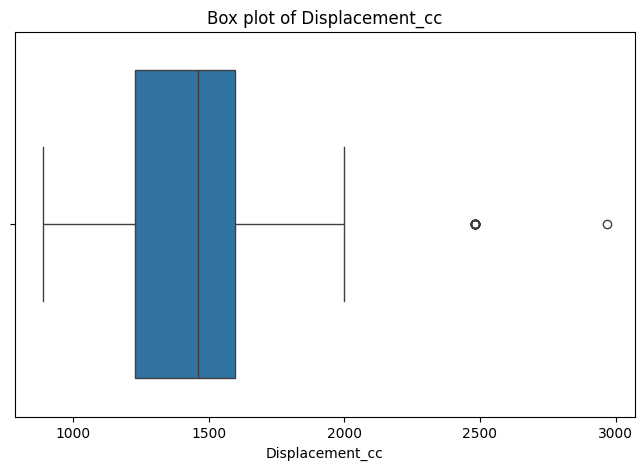

In [22]:
# Displacement_cc outlier analysis
plt.figure(figsize=(8,5))
sns.boxplot(x=df['Displacement_cc'])
plt.title('Box plot of Displacement_cc')
plt.show()

In [23]:
Q1 = df['Displacement_cc'].quantile(0.25)
Q3 = df['Displacement_cc'].quantile(0.75)
IQR = Q3 - Q1
outliers = ((df['Displacement_cc'] < Q1 - 1.5*IQR) | (df['Displacement_cc'] > Q3 + 1.5*IQR))
outlier_percent = outliers.sum() / len(df) * 100
print(outlier_percent)

0.13195098963242224


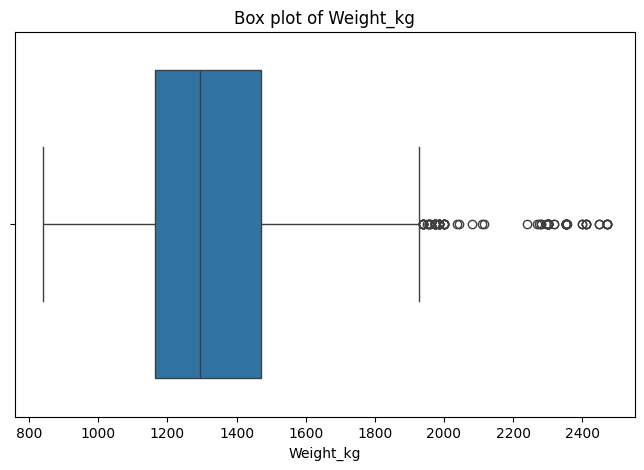

In [24]:
# Weight_kg outlier analysis
plt.figure(figsize=(8,5))
sns.boxplot(x=df['Weight_kg'])
plt.title('Box plot of Weight_kg')
plt.show()

In [25]:
Q1 = df['Weight_kg'].quantile(0.25)
Q3 = df['Weight_kg'].quantile(0.75)
IQR = Q3 - Q1
outliers = ((df['Weight_kg'] < Q1 - 1.5*IQR) | (df['Weight_kg'] > Q3 + 1.5*IQR))
outlier_percent = outliers.sum() / len(df) * 100
print(outlier_percent)

0.5466540999057493


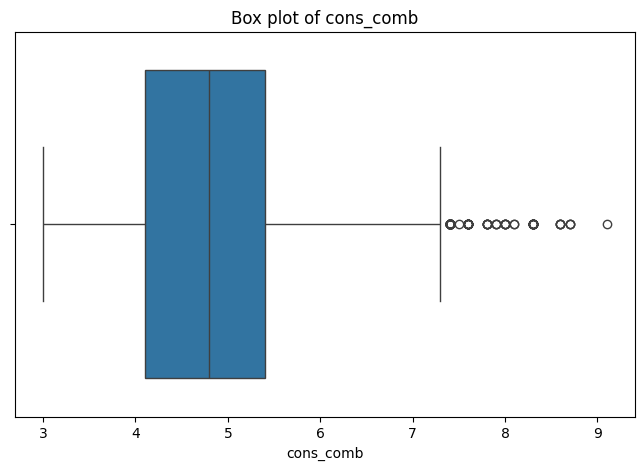

In [26]:
# cons_comb outlier analysis
plt.figure(figsize=(8,5))
sns.boxplot(x=df['cons_comb'])
plt.title('Box plot of cons_comb')
plt.show()

In [27]:
Q1 = df['cons_comb'].quantile(0.25)
Q3 = df['cons_comb'].quantile(0.75)
IQR = Q3 - Q1
outliers = ((df['cons_comb'] < Q1 - 1.5*IQR) | (df['cons_comb'] > Q3 + 1.5*IQR))
outlier_percent = outliers.sum() / len(df) * 100
print(outlier_percent)

0.7854225573358466


#### **2.3.2** Handle the outliers suitably.

In [28]:
# Handle outliers
df['km'] = np.log1p(df['km'])  # replaces original km

### **2.4 Feature Engineering**

#### **2.4.1** Analysis and feature engineering on `['Comfort_Convenience', 'Entertainment_Media', 'Extras', 'Safety_Security']`.

These columns contains lists of features present. Decide on how to include these features in the predictors.

In [29]:
# Check unique values in each feature spec column
df['Comfort_Convenience'] = df['Comfort_Convenience'].apply(lambda x: x if isinstance(x, list) else x.split(','))

unique_elements = set(sum(df['Comfort_Convenience'], []))
print(unique_elements)
print(len(unique_elements))

{'Cruise control', 'Automatic climate control', 'Light sensor', 'Auxiliary heating', 'Lumbar support', 'Seat ventilation', 'Windshield', 'Keyless central door lock', 'Armrest', 'Electrical side mirrors', 'Air suspension', 'Split rear seats', 'Air conditioning', 'Parking assist system self-steering', 'Leather steering wheel', 'Power windows', 'Seat heating', 'Park Distance Control', 'Leather seats', 'Panorama roof', 'Parking assist system sensors front', 'Electric tailgate', 'Heated steering wheel', 'Start-stop system', 'Tinted windows', 'Electric Starter', 'Electrically heated windshield', 'Hill Holder', 'Parking assist system sensors rear', 'Parking assist system camera', 'Wind deflector', 'Navigation system', 'Electrically adjustable seats', 'Sunroof', 'Massage seats', 'Multi-function steering wheel', 'Rain sensor', 'Heads-up display'}
38


In [30]:
# Check unique values in each feature spec column
df['Entertainment_Media'] = df['Entertainment_Media'].apply(lambda x: x if isinstance(x, list) else x.split(','))

unique_elements = set(sum(df['Entertainment_Media'], []))
print(unique_elements)
print(len(unique_elements))

{'Sound system', 'USB', 'CD player', 'Bluetooth', 'Radio', 'Digital radio', 'Television', 'MP3', 'Hands-free equipment', 'On-board computer'}
10


In [31]:
# Check unique values in each feature spec column
df['Extras'] = df['Extras'].apply(lambda x: x if isinstance(x, list) else x.split(','))

unique_elements = set(sum(df['Extras'], []))
print(unique_elements)
print(len(unique_elements))

{'Catalytic Converter', 'Voice Control', 'Sport suspension', 'Winter tyres', 'Handicapped enabled', 'Shift paddles', 'Sport seats', 'Trailer hitch', 'Ski bag', 'Right hand drive', 'Sport package', 'Roof rack', 'Tuned car', 'Alloy wheels', 'Cab or rented Car', 'Sliding door', 'Touch screen'}
17


In [32]:
# Check unique values in each feature spec column
df['Safety_Security'] = df['Safety_Security'].apply(lambda x: x if isinstance(x, list) else x.split(','))

unique_elements = set(sum(df['Safety_Security'], []))
print(unique_elements)
print(len(unique_elements))

{'Tire pressure monitoring system', 'Immobilizer', 'Passenger-side airbag', 'Central door lock with remote control', 'Driver drowsiness detection', 'Electronic stability control', 'Daytime running lights', 'Adaptive headlights', 'Night view assist', 'Blind spot monitor', 'Driver-side airbag', 'Isofix', 'Alarm system', 'ABS', 'LED Daytime Running Lights', 'Head airbag', 'Emergency system', 'Central door lock', 'LED Headlights', 'Emergency brake assistant', 'Side airbag', 'Xenon headlights', 'Traction control', 'Rear airbag', 'Adaptive Cruise Control', 'Power steering', 'Fog lights', 'Traffic sign recognition', 'Lane departure warning system'}
29


In [33]:
# Tried to one-hot encode for 'Comfort_Convenience', 'Entertainment_Media', 'Extras', 'Safety_Security' but it would blow up the RAM utilization.
# Hence removed these columns for easier processing

# chunk_size = 100000  # number of rows per chunk
# chunks = pd.read_csv("/content/Car_Price_data.csv", chunksize=chunk_size)
# df_new = pd.DataFrame()

# for i, chunk in enumerate(chunks):
#     print(f"Chunk {i}: {chunk.shape}")
#     # process the chunk here
#     df_exploded = chunk.explode("Entertainment_Media")

#     encoded = pd.get_dummies(df_exploded["Entertainment_Media"])
#     df_encoded = chunk.join(encoded).groupby(level=0).max()

#     df_exploded = df_exploded.explode("Safety_Security")
#     encoded = pd.get_dummies(df_exploded["Safety_Security"])
#     df_encoded = df_exploded.join(encoded).groupby(level=0).max()

#     df_exploded = df_exploded.explode("Extras")
#     encoded = pd.get_dummies(df_exploded["Extras"])
#     df_encoded = df_exploded.join(encoded).groupby(level=0).max()

#     df_exploded = df_exploded.explode("Comfort_Convenience")
#     encoded = pd.get_dummies(df_exploded["Comfort_Convenience"])
#     df_encoded = df_exploded.join(encoded).groupby(level=0).max()

#     df_new = pd.concat([df_new, df_encoded], ignore_index=True)


#     print(df_encoded.head())

In [34]:
df.describe()

,price,km,Gears,age,Previous_Owners,hp_kW,Inspection_new,Displacement_cc,Weight_kg,cons_comb
count,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000
mean,18024.380584,8.728622,5.937355,1.389695,1.042853,88.499340,0.247063,1428.661891,1337.700534,4.832124
std,7381.679318,3.035884,0.704772,1.121306,0.339178,26.674341,0.431317,275.804272,199.682385,0.867530
min,4950.000000,0.000000,5.000000,0.000000,0.000000,40.000000,0.000000,890.000000,840.000000,3.000000
25%,12850.000000,7.560861,5.000000,0.000000,1.000000,66.000000,0.000000,1229.000000,1165.000000,4.100000
50%,16900.000000,9.923976,6.000000,1.000000,1.000000,85.000000,0.000000,1461.000000,1295.000000,4.800000
75%,21900.000000,10.755794,6.000000,2.000000,1.000000,103.000000,0.000000,1598.000000,1472.000000,5.400000
max,74600.000000,12.666660,8.000000,3.000000,4.000000,294.000000,1.000000,2967.000000,2471.000000,9.100000


In [35]:
df.columns

Index(['make_model', 'body_type', 'price', 'vat', 'km', 'Type', 'Fuel',
       'Gears', 'Comfort_Convenience', 'Entertainment_Media', 'Extras',
       'Safety_Security', 'age', 'Previous_Owners', 'hp_kW', 'Inspection_new',
       'Paint_Type', 'Upholstery_type', 'Gearing_Type', 'Displacement_cc',
       'Weight_kg', 'Drive_chain', 'cons_comb'],
      dtype='object')

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15915 entries, 0 to 15914
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           15915 non-null  object 
 1   body_type            15915 non-null  object 
 2   price                15915 non-null  int64  
 3   vat                  15915 non-null  object 
 4   km                   15915 non-null  float64
 5   Type                 15915 non-null  object 
 6   Fuel                 15915 non-null  object 
 7   Gears                15915 non-null  float64
 8   Comfort_Convenience  15915 non-null  object 
 9   Entertainment_Media  15915 non-null  object 
 10  Extras               15915 non-null  object 
 11  Safety_Security      15915 non-null  object 
 12  age                  15915 non-null  float64
 13  Previous_Owners      15915 non-null  float64
 14  hp_kW                15915 non-null  float64
 15  Inspection_new       15915 non-null 

In [37]:
# Drop features from df
df = df.drop(columns=['Comfort_Convenience', 'Entertainment_Media', 'Safety_Security', 'Extras'])

#### **2.4.2** Perform feature encoding.

In [38]:
str_cols = df.select_dtypes(include=['object']).columns
for col in str_cols:
    print(f"\nColumn: {col}")
    print(df[col].unique())


Column: make_model
['Audi A1' 'Audi A2' 'Audi A3' 'Opel Astra' 'Opel Corsa' 'Opel Insignia'
 'Renault Clio' 'Renault Duster' 'Renault Espace']

Column: body_type
['Sedans' 'Station wagon' 'Compact' 'Coupe' 'Van' 'Off-Road' 'Convertible'
 'Transporter']

Column: vat
['VAT deductible' 'Price negotiable']

Column: Type
['Used' 'Company/Short-use' 'New-like']

Column: Fuel
['Diesel' 'Benzine' 'LPG/CNG' 'Electric']

Column: Paint_Type
['Metallic' 'Uni/basic' 'Perl effect']

Column: Upholstery_type
['Cloth' 'Part/Full Leather']

Column: Gearing_Type
['Automatic' 'Manual' 'Semi-automatic']

Column: Drive_chain
['front' '4WD' 'rear']


In [39]:
# make_model
# freq = df["make_model"].value_counts()
# df["make_model"] = df["make_model"].map(freq)

In [40]:
df["vat"] = df["vat"].map({ 'VAT deductible': 0, 'Price negotiable': 1})

df["Upholstery_type"] = df["Upholstery_type"].map({'Cloth': 0, 'Part/Full Leather': 1})

In [41]:
df = pd.get_dummies(df, columns=["make_model","body_type", "Type", "Fuel", "Paint_Type", "Gearing_Type", "Drive_chain"], drop_first=True)

In [42]:
# Encode features
bool_cols = df.select_dtypes(include=['bool']).columns
df[bool_cols] = df[bool_cols].astype(int)

#### **2.4.3** Split the data into training and testing sets.

In [43]:
# Transform the target feature
df["price"].skew()
df["price_log"] = np.log(df["price"])

In [44]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=["price", "price_log"])   # everything except price
y = df["price_log"]                  # only price
y_org = df["price"]

# Split data
X_train, X_test, y_train, y_test, yorg_train, yorg_test = train_test_split(
    X, y, y_org,
    test_size=0.2,       # 20% test data
    random_state=42,     # for reproducibility
)


#### **2.4.4** Scale the features

In [45]:
from sklearn.preprocessing import MinMaxScaler

# Scale features
cols_to_scale = ["km", "Gears", "age", "hp_kW", "Displacement_cc", "Weight_kg", "cons_comb"]

# Apply MinMaxScaler only to selected columns
scaler = MinMaxScaler()
X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])
X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])

## **3 Linear Regression Models**


### **3.1 Baseline Linear Regression Model**

#### **3.1.1** Build and fit a basic linear regression model. Perform evaluation using suitable metrics.

In [46]:
from sklearn.linear_model import LinearRegression

# Initialise and train model
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_train)
residuals = y_train - y_pred

y_pred_test = model.predict(X_test)
residuals_test = y_test - y_pred_test

In [47]:
# Get coefficients
coef = model.coef_
intercept = model.intercept_

# Put into DataFrame
coef_df = pd.DataFrame({
    "Feature": X_train.columns,
    "Coefficients basic": coef
})

print("Intercept:", intercept)
print(coef_df)

Intercept: 10.068260489007772
                        Feature  Coefficients basic
0                           vat        3.917006e-03
1                            km       -1.195438e-01
2                         Gears        7.607932e-02
3                           age       -4.432375e-01
4               Previous_Owners        9.957482e-03
5                         hp_kW        1.071614e+00
6                Inspection_new        1.030213e-02
7               Upholstery_type        4.036742e-02
8               Displacement_cc       -3.246120e-02
9                     Weight_kg       -1.071878e-01
10                    cons_comb        5.625313e-04
11           make_model_Audi A2        5.273559e-16
12           make_model_Audi A3        6.922747e-02
13        make_model_Opel Astra       -2.280353e-01
14        make_model_Opel Corsa       -4.705158e-01
15     make_model_Opel Insignia       -3.749484e-02
16      make_model_Renault Clio       -4.103996e-01
17    make_model_Renault Duster   

In [48]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Evaluate the model's performance
y_train_pred_lr = np.expm1(y_pred)

mae = mean_absolute_error(yorg_train, y_train_pred_lr)
mse = mean_squared_error(yorg_train, y_train_pred_lr)
rmse = np.sqrt(mse)
r2 = r2_score(yorg_train, y_train_pred_lr)

print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

MAE: 1743.7875
MSE: 7231767.7579
RMSE: 2689.1946
R²: 0.8676


In [49]:
# Evaluate the model's performance
y_test_pred_lr = np.expm1(y_pred_test)

mae = mean_absolute_error(yorg_test, y_test_pred_lr)
mse = mean_squared_error(yorg_test, y_test_pred_lr)
rmse = np.sqrt(mse)
r2 = r2_score(yorg_test, y_test_pred_lr)

print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

MAE: 1711.0832
MSE: 6600845.3503
RMSE: 2569.2110
R²: 0.8777


#### **3.1.2** Analyse residuals and check other assumptions of linear regression.

Check for linearity by analysing residuals vs predicted values

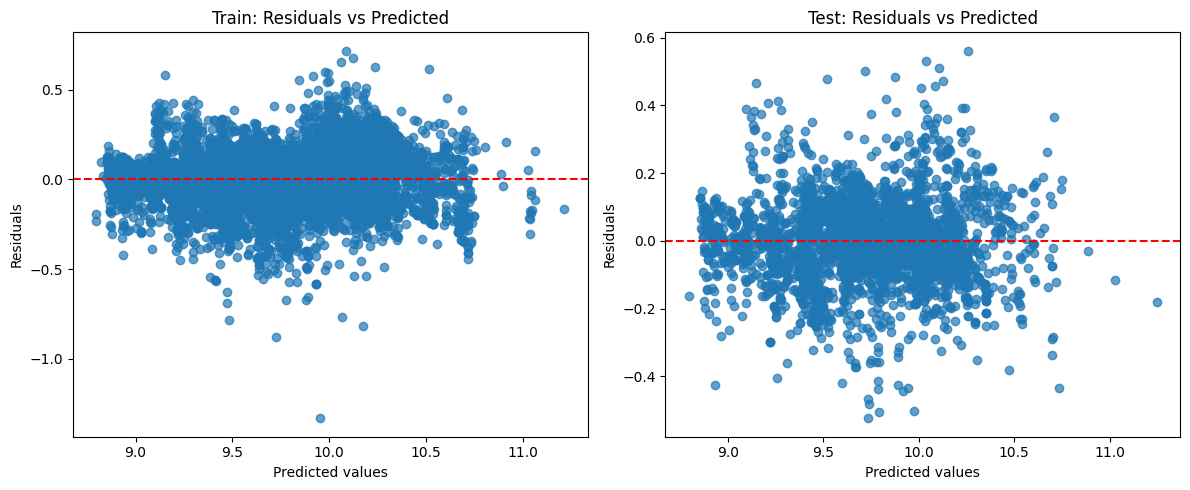

In [50]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

# Train residuals plot
axes[0].scatter(y_pred, residuals, alpha=0.7)
axes[0].axhline(0, color='red', linestyle='--')
axes[0].set_xlabel("Predicted values")
axes[0].set_ylabel("Residuals")
axes[0].set_title("Train: Residuals vs Predicted")

# Test residuals plot
axes[1].scatter(y_pred_test, residuals_test, alpha=0.7)
axes[1].axhline(0, color='red', linestyle='--')
axes[1].set_xlabel("Predicted values")
axes[1].set_ylabel("Residuals")
axes[1].set_title("Test: Residuals vs Predicted")

plt.tight_layout()
plt.show()


Check normality in residual distribution

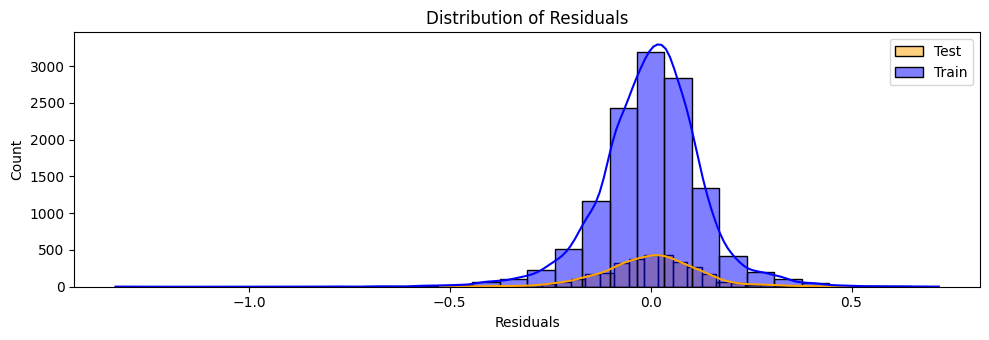

In [51]:
# Check the normality of residuals by plotting their distribution

# Linearity check: Plot residuals vs fitted values
fig, axes = plt.subplots(1, 1, figsize = (10, 3.5))
sns.histplot(residuals_test, kde = True, bins = 30, ax = axes, color = 'orange', label = 'Test', alpha = 0.5)
sns.histplot(residuals, kde = True, bins = 30, ax = axes, color = 'blue', label = 'Train', alpha = 0.5)
# sns.histplot(residuals_test, kde = True, bins = 30, ax = axes[1], color = 'orange', label = 'Test', alpha = 0.5)
axes.set_xlabel('Residuals'); axes.set_title('Distribution of Residuals'); axes.legend(); plt.tight_layout()


Check multicollinearity using Variance Inflation Factor (VIF) and handle features with high VIF.

In [52]:
# Check for multicollinearity and handle
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Suppose your training data is in X_train (after encoding/scaling, without target column)
X = X_train.copy()

# Add constant for statsmodels
X_const = sm.add_constant(X)

# Compute VIF
vif = pd.DataFrame()
vif["Feature"] = X_const.columns
vif["VIF"] = [variance_inflation_factor(X_const.values, i)
              for i in range(X_const.shape[1])]

print(vif)

/usr/local/lib/python3.12/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


                        Feature         VIF
0                         const  219.672304
1                           vat    1.142326
2                            km    3.413778
3                         Gears    2.829781
4                           age    2.792413
5               Previous_Owners    1.195658
6                         hp_kW    6.963050
7                Inspection_new    1.086197
8               Upholstery_type    1.440756
9               Displacement_cc    6.612495
10                    Weight_kg    3.782072
11                    cons_comb    4.183124
12           make_model_Audi A2         NaN
13           make_model_Audi A3    2.709785
14        make_model_Opel Astra    2.451395
15        make_model_Opel Corsa    3.821129
16     make_model_Opel Insignia    4.730964
17      make_model_Renault Clio    1.957717
18    make_model_Renault Duster    2.883035
19    make_model_Renault Espace    8.675925
20        body_type_Convertible    1.011330
21              body_type_Coupe 

### **3.2 Ridge Regression Implementation**

#### **3.2.1** Define a list of random alpha values

In [53]:
# List of alphas to tune for Ridge regularisation
from sklearn.linear_model import RidgeCV

alphas = np.logspace(-3, 3, 50)  # 0.001 to 1000
print(alphas)

[1.00000000e-03 1.32571137e-03 1.75751062e-03 2.32995181e-03
 3.08884360e-03 4.09491506e-03 5.42867544e-03 7.19685673e-03
 9.54095476e-03 1.26485522e-02 1.67683294e-02 2.22299648e-02
 2.94705170e-02 3.90693994e-02 5.17947468e-02 6.86648845e-02
 9.10298178e-02 1.20679264e-01 1.59985872e-01 2.12095089e-01
 2.81176870e-01 3.72759372e-01 4.94171336e-01 6.55128557e-01
 8.68511374e-01 1.15139540e+00 1.52641797e+00 2.02358965e+00
 2.68269580e+00 3.55648031e+00 4.71486636e+00 6.25055193e+00
 8.28642773e+00 1.09854114e+01 1.45634848e+01 1.93069773e+01
 2.55954792e+01 3.39322177e+01 4.49843267e+01 5.96362332e+01
 7.90604321e+01 1.04811313e+02 1.38949549e+02 1.84206997e+02
 2.44205309e+02 3.23745754e+02 4.29193426e+02 5.68986603e+02
 7.54312006e+02 1.00000000e+03]


#### **3.2.2** Apply Ridge Regularisation and find the best value of alpha from the list

In [54]:
# Applying Ridge regression
ridge_cv = RidgeCV(alphas=alphas, cv=5)
ridge_cv.fit(X_train, y_train)

print("Best alpha:", ridge_cv.alpha_)

Best alpha: 1.151395399326447


In [55]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# Log-spaced alpha values
alphas = np.logspace(-3, 3, 50)

train_scores = []
cv_scores = []

for alpha in alphas:
    model = Ridge(alpha=alpha)

    # Train score (R² on training data)
    model.fit(X_train, y_train)
    train_scores.append(model.score(X_train, y_train))

    # Cross-validation score (R²)
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
    cv_scores.append(scores.mean())


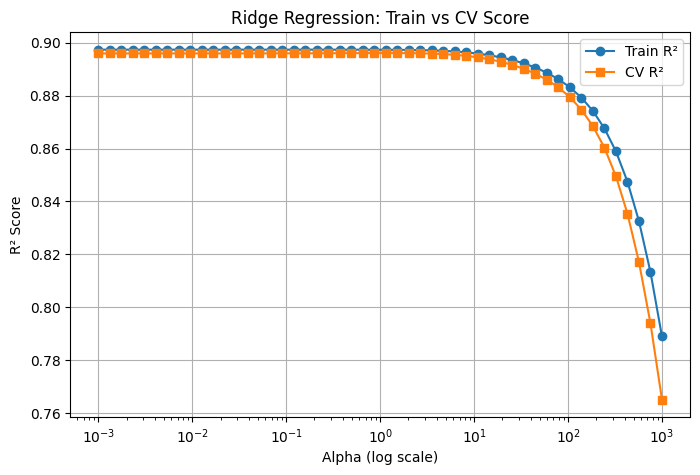

In [56]:
# Plot train and test scores against alpha
plt.figure(figsize=(8,5))
plt.semilogx(alphas, train_scores, label='Train R²', marker='o')
plt.semilogx(alphas, cv_scores, label='CV R²', marker='s')
plt.xlabel('Alpha (log scale)')
plt.ylabel('R² Score')
plt.title('Ridge Regression: Train vs CV Score')
plt.legend()
plt.grid(True)
plt.show()


Find the best alpha value.

In [57]:
# Best alpha value
print("Best alpha:", ridge_cv.alpha_)


Best alpha: 1.151395399326447


We will get some best value of alpha above. This however is not the most accurate value but the best value from the given list. Now we have a rough estimate of the range that best alpha falls in. Let us do another iteration over the values in a smaller range.

#### **3.2.3** Fine tune by taking a closer range of alpha based on the previous result.

In [58]:
# Take a smaller range of alpha to test
alphas = np.linspace(0.5, 2, 50)

In [59]:
# Applying Ridge regression
ridge_cv = RidgeCV(alphas=alphas, cv=5)
ridge_cv.fit(X_train, y_train)

print("Best alpha:", ridge_cv.alpha_)


Best alpha: 1.2040816326530612


In [60]:
train_scores = []
cv_scores = []

for alpha in alphas:
    model = Ridge(alpha=alpha)

    # Train score (R² on training data)
    model.fit(X_train, y_train)
    train_scores.append(model.score(X_train, y_train))

    # Cross-validation score (R²)
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
    cv_scores.append(scores.mean())

Plot the error-alpha graph again and find the actual optimal value for alpha.

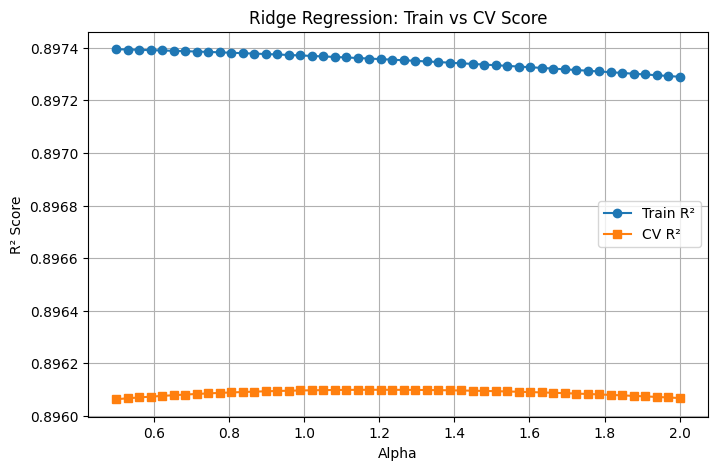

In [61]:
# Plot train and test scores against alpha
plt.figure(figsize=(8,5))
plt.plot(alphas, train_scores, label='Train R²', marker='o')
plt.plot(alphas, cv_scores, label='CV R²', marker='s')
plt.xlabel('Alpha')
plt.ylabel('R² Score')
plt.title('Ridge Regression: Train vs CV Score')
plt.legend()
plt.grid(True)
plt.show()

In [62]:
# Set best alpha for Ridge regression
# Fit the Ridge model to get the coefficients of the fitted model
# Initialize ridge with best alpha
ridge_best = Ridge(alpha=ridge_cv.alpha_)

# Fit on training data
ridge_best.fit(X_train, y_train)

# Predict on train and test
y_train_pred = ridge_best.predict(X_train)
y_test_pred  = ridge_best.predict(X_test)

y_train_pred_ridge = np.expm1(y_train_pred)
y_test_pred_ridge  = np.expm1(y_test_pred)

# Evaluate
print("Train R²:", r2_score(yorg_train, y_train_pred_ridge))
print("Test R² :", r2_score(yorg_test, y_test_pred_ridge))

print("Train MAE:", mean_absolute_error(yorg_train, y_train_pred_ridge))
print("Test MAE :", mean_absolute_error(yorg_test, y_test_pred_ridge))

print("Train RMSE:", np.sqrt(mean_squared_error(yorg_train, y_train_pred_ridge)))
print("Test RMSE :", np.sqrt(mean_squared_error(yorg_test, y_test_pred_ridge)))

Train R²: 0.8676011219805554
Test R² : 0.8775963251005998
Train MAE: 1744.445954577565
Test MAE : 1712.4026241260099
Train RMSE: 2688.9342328807215
Test RMSE : 2570.180962320662


In [63]:
# Show the coefficients for each feature

coefs = ridge_best.coef_

# Put them into a DataFrame with feature names
coef_df_ridge = pd.DataFrame({
    "Feature": X_train.columns,
    "Coefficients ridge": coefs
}).sort_values(by="Coefficients ridge", key=abs, ascending=False)

coef_df_ridge

,Feature,Coefficients ridge
5,hp_kW,1.022339
14,make_model_Opel Corsa,-0.475742
17,make_model_Renault Duster,-0.448658
3,age,-0.443074
16,make_model_Renault Clio,-0.410607
13,make_model_Opel Astra,-0.226927
18,make_model_Renault Espace,0.200862
33,Gearing_Type_Manual,-0.152293
1,km,-0.118464
34,Gearing_Type_Semi-automatic,0.107458


### **3.3 Lasso Regression Implementation**

#### **3.3.1** Define a list of random alpha values

In [64]:
# List of alphas to tune for Lasso regularisation
alphas = np.logspace(-5, 1, 100)  # 0.001 to 1000
# print(alphas)


#### **3.3.2** Apply Lasso Regularisation and find the best value of alpha from the list

In [65]:
# Initialise Lasso regression model

from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score

train_scores = []
val_scores = []

for alpha in alphas:
    model = Lasso(alpha=alpha, max_iter=5000)

    # Train score (R² on training set)
    model.fit(X_train, y_train)
    train_scores.append(model.score(X_train, y_train))

    # Cross-validation score (R²)
    cv_score = cross_val_score(model, X_train, y_train, cv=5, scoring="r2").mean()
    val_scores.append(cv_score)

# Convert to numpy arrays
train_scores = np.array(train_scores)
val_scores = np.array(val_scores)

idx = np.argmax(val_scores)
print(idx)
print("Best alpha: ", alphas[idx])


14
Best alpha:  7.054802310718646e-05


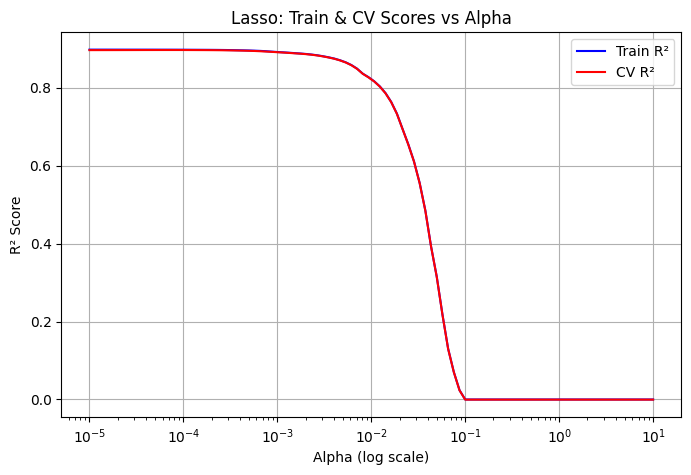

In [66]:
# Plot train and test scores against alpha

plt.figure(figsize=(8,5))
plt.plot(alphas, train_scores, label="Train R²", color="blue")
plt.plot(alphas, val_scores, label="CV R²", color="red")
plt.xscale("log")  # alpha on log scale
plt.xlabel("Alpha (log scale)")
plt.ylabel("R² Score")
plt.title("Lasso: Train & CV Scores vs Alpha")
plt.legend()
plt.grid(True)
plt.show()

In [67]:
# Import LassoCV
from sklearn.linear_model import LassoCV

lasso_cv = LassoCV(alphas = np.linspace(0.00001, 0.0001, 100), cv=5, max_iter=5000)
lasso_cv.fit(X_train, y_train)
print("Best alpha:", lasso_cv.alpha_)

Best alpha: 7.454545454545455e-05


In [68]:
# Set best alpha for Lasso regression
best_alpha = lasso_cv.alpha_

# Fit the Lasso model on scaled training data
# Get the coefficients of the fitted model
lasso = Lasso(alpha=best_alpha, max_iter=5000)  # increase max_iter if convergence warning

lasso.fit(X_train, y_train)

y_train_pred = lasso.predict(X_train)

In [69]:
# Check the coefficients for each feature
# Get coefficients
coef = lasso.coef_

# Put into DataFrame for readability
coef_df_lasso = pd.DataFrame({
    "Feature": X_train.columns,
    "Coefficients lasso": coef
})

print(coef_df_lasso)


                        Feature  Coefficients lasso
0                           vat            0.003039
1                            km           -0.115538
2                         Gears            0.074903
3                           age           -0.443427
4               Previous_Owners            0.010741
5                         hp_kW            1.038447
6                Inspection_new            0.010026
7               Upholstery_type            0.040849
8               Displacement_cc           -0.015415
9                     Weight_kg           -0.086975
10                    cons_comb            0.000000
11           make_model_Audi A2            0.000000
12           make_model_Audi A3            0.067271
13        make_model_Opel Astra           -0.228919
14        make_model_Opel Corsa           -0.472882
15     make_model_Opel Insignia           -0.039334
16      make_model_Renault Clio           -0.409110
17    make_model_Renault Duster           -0.455191
18    make_m

In [70]:
from sklearn.linear_model import Lasso

# Initialize Lasso with an alpha value (regularization strength)
lasso = Lasso(alpha=best_alpha, max_iter=5000)  # increase max_iter if convergence warning

lasso.fit(X_train, y_train)

y_train_pred = lasso.predict(X_train)


In [71]:
# Evaluate the Lasso model on the test data
y_test_pred  = lasso.predict(X_test)

In [72]:
y_train_pred_lasso = np.expm1(y_train_pred)
y_test_pred_lasso  = np.expm1(y_test_pred)

# Evaluate
print("Train R²:", r2_score(yorg_train, y_train_pred_lasso))
print("Test R² :", r2_score(yorg_test, y_test_pred_lasso))

print("Train MAE:", mean_absolute_error(yorg_train, y_train_pred_lasso))
print("Test MAE :", mean_absolute_error(yorg_test, y_test_pred_lasso))

print("Train RMSE:", np.sqrt(mean_squared_error(yorg_train, y_train_pred_lasso)))
print("Test RMSE :", np.sqrt(mean_squared_error(yorg_test, y_test_pred_lasso)))

Train R²: 0.8673273187337026
Test R² : 0.8777750606281283
Train MAE: 1744.3755349507176
Test MAE : 1712.184401948742
Train RMSE: 2691.7131789292293
Test RMSE : 2568.3037700211426


### **3.4 Regularisation Comparison & Analysis**

#### **3.4.1** Compare the evaluation metrics for each model.

In [73]:
# Compare metrics for each model
import numpy as np
from sklearn.metrics import mean_absolute_error

y_pred_baseline = np.full_like(yorg_test, fill_value=yorg_train.mean())
mae_baseline = mean_absolute_error(yorg_test, y_pred_baseline)

print("Baseline MAE:", mae_baseline)

Baseline MAE: 5650.604147031103


In [74]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def evaluate_model(y_train, y_train_pred, y_test, y_test_pred):
    metrics = {}

    # Train metrics
    metrics["Train MAE"] = mean_absolute_error(y_train, y_train_pred)
    metrics["Train RMSE"] = np.sqrt(mean_squared_error(y_train, y_train_pred))
    metrics["Train R²"] = r2_score(y_train, y_train_pred)

    # Test metrics
    metrics["Test MAE"] = mean_absolute_error(y_test, y_test_pred)
    metrics["Test RMSE"] = np.sqrt(mean_squared_error(y_test, y_test_pred))
    metrics["Test R²"] = r2_score(y_test, y_test_pred)

    return metrics

In [75]:
# Linear regression with no regularisation
metrics_lr = evaluate_model(yorg_train, y_train_pred_lr, yorg_test, y_test_pred_lr)

for k, v in metrics_lr.items():
    print(f"{k}: {v}")

Train MAE: 1743.7875186864221
Train RMSE: 2689.1946299801084
Train R²: 0.8675754776544704
Test MAE: 1711.0831667930345
Test RMSE: 2569.2110365461153
Test R²: 0.8776886921980068


In [76]:
# Ridge regression
metrics_ridge = evaluate_model(yorg_train, y_train_pred_ridge, yorg_test, y_test_pred_ridge)

for k, v in metrics_ridge.items():
    print(f"{k}: {v}")

Train MAE: 1744.445954577565
Train RMSE: 2688.9342328807215
Train R²: 0.8676011219805554
Test MAE: 1712.4026241260099
Test RMSE: 2570.180962320662
Test R²: 0.8775963251005998


In [77]:
# Lasso regression
metrics_lasso = evaluate_model(yorg_train, y_train_pred_lasso, yorg_test, y_test_pred_lasso)

for k, v in metrics_lasso.items():
    print(f"{k}: {v}")

Train MAE: 1744.3755349507176
Train RMSE: 2691.7131789292293
Train R²: 0.8673273187337026
Test MAE: 1712.184401948742
Test RMSE: 2568.3037700211426
Test R²: 0.8777750606281283


#### **3.4.2** Compare the coefficients for the three models.

In [78]:
# Compare highest coefficients and coefficients of eliminated features
coef_compare = coef_df.merge(coef_df_ridge, on="Feature").merge(coef_df_lasso, on="Feature")
coef_compare.set_index("Feature", inplace=True)

# Linear regression without regularisation
coef_compare_sorted = coef_compare.sort_values(by="Coefficients basic", key=np.abs)

# Display first 5 rows (smallest values)
print("Lowest coefficients for lr model:\n")
print(coef_compare_sorted['Coefficients basic'].head())

# Display last 5 rows (largest values)
print("\nHighest values for lr model:\n")
print(coef_compare_sorted['Coefficients basic'].tail())

# Ridge regularisation
coef_compare_sorted = coef_compare.sort_values(by="Coefficients ridge", key=np.abs)

# Display first 5 rows (smallest values)
print("\nLowest coefficients for ridge model:\n")
print(coef_compare_sorted['Coefficients ridge'].head())

# Display last 5 rows (largest values)
print("\nHighest values for ridge model:\n")
print(coef_compare_sorted['Coefficients ridge'].tail())

# Lasso regularisation
coef_compare_sorted = coef_compare.sort_values(by="Coefficients lasso", key=np.abs)

# Display first 5 rows (smallest values)
print("\nLowest coefficients for lasso model:\n")
print(coef_compare_sorted['Coefficients lasso'].head())

# Display last 5 rows (largest values)
print("\nHighest values for lasso model:\n")
print(coef_compare_sorted['Coefficients lasso'].tail())

Lowest coefficients for lr model:

Feature
make_model_Audi A2      5.273559e-16
cons_comb               5.625313e-04
Fuel_Diesel            -3.909363e-03
vat                     3.917006e-03
Paint_Type_Uni/basic   -5.653098e-03
Name: Coefficients basic, dtype: float64

Highest values for lr model:

Feature
make_model_Renault Clio     -0.410400
age                         -0.443238
make_model_Opel Corsa       -0.470516
make_model_Renault Duster   -0.497223
hp_kW                        1.071614
Name: Coefficients basic, dtype: float64

Lowest coefficients for ridge model:

Feature
make_model_Audi A2      0.000000
vat                     0.003764
cons_comb               0.006436
Paint_Type_Uni/basic   -0.007116
Fuel_Diesel            -0.008150
Name: Coefficients ridge, dtype: float64

Highest values for ridge model:

Feature
make_model_Renault Clio     -0.410607
age                         -0.443074
make_model_Renault Duster   -0.448658
make_model_Opel Corsa       -0.475742
hp_kW         

## **4 Conclusion & Key Takeaways**

There is no improvement in the metrics after performing regularisation (Ridge and lasso)

This could be because there is no overfitting in the Linear regression model.

The data has class imbalances. If there was a more balanced data, the model would be much better.

Just a linear model seems to be sufficient to get a model performance with the following metrics:


*   Train MAE: 1743.7875186864221
* Train RMSE: 2689.1946299801084
* Train R²: 0.8675754776544704
* Test MAE: 1711.0831667930345
* Test RMSE: 2569.2110365461153
* Test R²: 0.8776886921980068






#### **4.1 Conclude with outcomes and insights gained**

Initially when one-hot encoding was done without dropping one of the columns, it gave rise to multicollinearity issue. There was a noticeable improvement in the R² value in the regularised model.

But with the dropping of one of the columns while one-hot encoding the columns, there is no need for regularisation.